In [ ]:
#Data Wrangling II Create an “Academic performance” dataset of students and perform the following operations using Python.
#
 #   Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
  #  Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
 #   Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a 
  #  normal distribution. Reason and document your approach properly.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("tecdiv.csv")

In [7]:
data.head(5)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [9]:
data.describe

<bound method NDFrame.describe of              Timestamp                       Email Address  \
0   1/17/2022 12:45:09       sejal.zambare19@pccoepune.org   
1   1/17/2022 12:45:44    rushikesh.thorat19@pccoepune.org   
2   1/17/2022 12:46:10     atharv.sontakke19@pccoepune.org   
3   1/17/2022 12:46:21     amisha.sherekar19@pccoepune.org   
4   1/17/2022 12:46:31  saurabh.sawardekar19@pccoepune.org   
..                 ...                                 ...   
59   1/20/2022 9:24:40      pratik.meshram20@pccoepune.org   
60   1/20/2022 9:36:14         prasad.zore19@pccoepune.org   
61   1/20/2022 9:42:34         sudhir.varu19@pccoepune.org   
62  1/20/2022 10:22:05  bhagyashree.takale19@pccoepune.org   
63  1/20/2022 10:38:06    sarvesh.waghmare19@pccoepune.org   

                         Name                               Email  Roll no   \
0               Sejal Zambare           sejal.zambare19@gmail.com  TECOC359   
1      Rushikesh Vilas Thorat    rushikesh.thorat19@pccoepune.o

In [17]:
#CHECK MISSING VALUES
data.isnull().sum()  

Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     0
First year:   Sem 2     0
Second year:   Sem 1    0
Second year:   Sem 2    0
dtype: int64

In [15]:
#CHECK MISSING VALUES (Columnwise )
data['Name'].isnull().sum()  

0

In [21]:
# Check Duplicates Value
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


In [25]:
# Check Duplicates Value (Columnwise)
print("Duplicates in Email:", data['Email'].duplicated().sum())

Duplicates in Email: 0


In [29]:
# Overlook of the missing values (% wise )
print("\nPercentage of Missing Values:")
print((data.isnull().sum() / len(data)) * 100)


Percentage of Missing Values:
Timestamp               0.0
Email Address           0.0
Name                    0.0
Email                   0.0
Roll no                 0.0
PRN No.                 0.0
Mobile No.              0.0
First year:   Sem 1     0.0
First year:   Sem 2     0.0
Second year:   Sem 1    0.0
Second year:   Sem 2    0.0
dtype: float64


In [33]:
# Overlook of the duplicate values (% wise )

print("\nPercentage of Duplicate Values:")
print((data.duplicated().sum() / len(data)) * 100)


Percentage of Duplicate Values:
0.0


In [136]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Check if duplicates are removed
print(f"Data shape after removing duplicates: {data_no_duplicates.shape}")

Data shape after removing duplicates: (64, 11)


In [55]:
####   HANDLING OF MISSING VALUES
numeric_columns = data.select_dtypes(include=[np.number]).columns


In [113]:
# CALCULATING MEAN OF ALL NUMERIC COLUMNS AND FILLING MISSING VALUES
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean()) 
data.head(5)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [73]:
# CALCULATING MEAN OF ALL NUMERIC COLUMNS AND FILLING MISSING VALUES

categorical_columns = data.select_dtypes(include=[object]).columns

for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Replacing missing values with column mode

data.head(5)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [103]:
## Calculate Mean   Coulmnwise

mean_F1= data["First year:   Sem 1"].mean()
print("Mean For FE SEM 1 :",mean_F1)

Mean For FE SEM 1 : 8.83421875


In [105]:
##fill the missing values with mean Coulmnwise

data['First year:   Sem 1'] = data['First year:   Sem 1'].fillna(mean_F1)
data.head(3)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14


In [107]:
## Calculate Mode  Coulmnwise
 
mode_f1= data["First year:   Sem 1"].mode()
print("Mode For FE SEM 1 :",mode_f1)

Mode For FE SEM 1 : 0    0.0
Name: First year:   Sem 1, dtype: float64


In [109]:
##fill the missing values with mean   Coulmnwise

data['First year:   Sem 1'] = data['First year:   Sem 1'].fillna(mode_f1)
data.head(3)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14


In [115]:
# Check how many rows have missing values  over look
print("Before dropping, shape:", data.shape)
print("Missing values per column:\n", data.isnull().sum())


Before dropping, shape: (64, 11)
Missing values per column:
 Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     0
First year:   Sem 2     0
Second year:   Sem 1    0
Second year:   Sem 2    0
dtype: int64


In [117]:
# Drop rows where ANY value is missing

data_cleaned = data.dropna()

In [119]:
# Shape after dropping
print("After dropping, shape:", data_cleaned.shape)

After dropping, shape: (64, 11)


In [ ]:
##############      OUTLIERS HANDLING   #####################

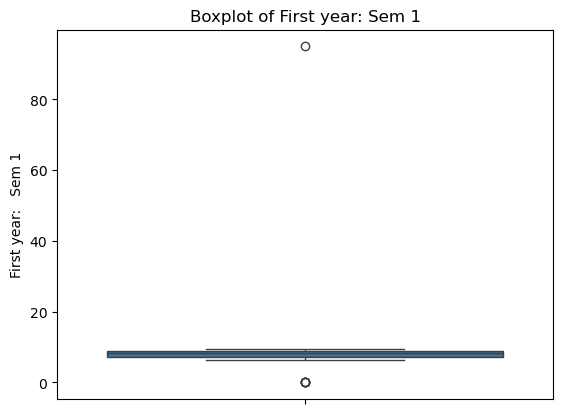

In [127]:
## Checking Outliers columnwise
### Before handling Outliers
sns.boxplot(y=data['First year:   Sem 1'])
plt.title('Boxplot of First year: Sem 1')
plt.show()

In [134]:
####    REMOVING OUTLIERS

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['First year:   Sem 1'].quantile(0.25)
Q3 = data['First year:   Sem 1'].quantile(0.75)
#Q1 (25th percentile) is the value below which 25% of the data falls.
#Q3 (75th percentile) is the value below which 75% of the data falls.
#The quantile(0.25) function gives us Q1, and quantile(0.75) gives us Q3.
# Calculate IQR
IQR = Q3 - Q1
#IQR is the difference between the 75th and 25th percentiles (Q3 - Q1).

#It represents the spread of the middle 50% of the data
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_filtered = data[(data['First year:   Sem 1'] >= lower_bound) & (data['First year:   Sem 1'] <= upper_bound)]
#The condition data['First year: Sem 1'] >= lower_bound checks that the value is greater than or equal to the lower bound, 
#and data['First year: Sem 1'] <= upper_bound ensures it is less than or equal to the upper bound.
# Check the shape of the data after removing outliers
print("Data shape after removing outliers:", data_filtered.shape)

Data shape after removing outliers: (64, 11)


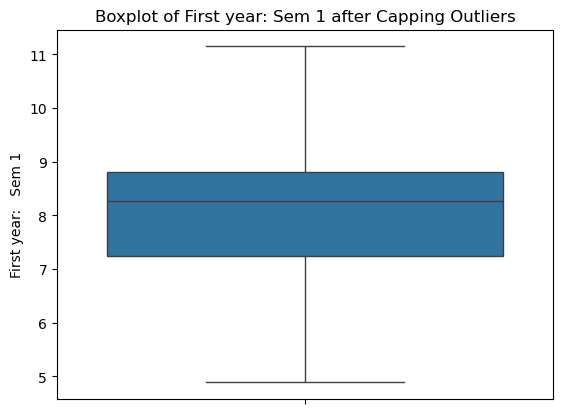

In [132]:
#### After Handling Outliers

# Cap the outliers at the lower and upper bounds
data['First year:   Sem 1'] = data['First year:   Sem 1'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

# Check the updated column
sns.boxplot(y=data['First year:   Sem 1'])
plt.title('Boxplot of First year: Sem 1 after Capping Outliers')
plt.show()